In [24]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import librosa.display
import librosa

from glob import glob

import ffmpeg

In [25]:
dinner_audio = pd.read_csv('/home/alejandro/IRONHACK/LABORATORIOS/datamad0119/final-project/csv/dinner_audio.csv')

In [26]:
dinner_audio

,id,name,mfcc,scem,scom,srom,sbwm,tempo,rmse
0,1,A Touch Of Silver.mp3,2.182090,2008.227306,22.166286,4271.332505,2362.906658,129.199219,4.348369
1,2,All The Joy.mp3,-0.420979,1810.502120,22.819678,3800.143688,2217.648805,89.102909,3.749902
2,3,Almost Like Being in Love.mp3,0.431973,1920.574739,20.068933,4231.882744,2553.858556,95.703125,4.450774
3,4,Angel (Live).mp3,5.984499,1777.566251,21.454589,3898.109762,2247.092578,161.499023,6.248868
4,5,Anniversary - Radio Edit.mp3,1.475227,2629.842184,21.647935,5873.931148,2734.929565,89.102909,3.963258
5,6,"Baby, This Love I Have.mp3",-0.554018,2119.068513,22.432902,4437.098169,2293.621392,161.499023,3.501133
6,7,Bee Blues.mp3,-0.008894,1390.242664,22.375571,3006.556820,1976.764666,129.199219,3.360394
7,8,Begin The Beguine - Alternate Take.mp3,-0.204070,1768.841269,22.529183,3831.851829,2278.235229,92.285156,3.510815
8,9,Blue Monk.mp3,-1.216744,1786.913239,22.355133,4017.275708,2420.404915,103.359375,2.836167
9,10,Blues for Sharpie.mp3,0.452922,2484.395667,21.624494,6717.251048,3132.485393,143.554688,2.885712


In [27]:
dinner_track = pd.read_csv('/home/alejandro/IRONHACK/LABORATORIOS/datamad0119/final-project/csv/dinner_track.csv')

In [28]:
dinner_track.head()

,id,name,uri,artist,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,4dn6rw5Ze1uWrLm1uOk1gu,Stockholm Sweetnin',spotify:track:4dn6rw5Ze1uWrLm1uOk1gu,"Scott Hamilton, Jesper Lundgaard, Jan Lundgren...",0.838,0.602,475680,0.302,0.9070,8,0.1130,-11.627,1,0.0427,119.758,4,0.300
1,6CDQBADsdzJwc3qZ3OPDHH,Almost Like Being in Love,spotify:track:6CDQBADsdzJwc3qZ3OPDHH,"Red Garland, Paul Chambers, Art Taylor,",0.873,0.571,290293,0.346,0.5190,0,0.0980,-12.569,0,0.0409,93.885,4,0.687
2,00CIFNT8kOm61dupysBFp8,Garden of Delight,spotify:track:00CIFNT8kOm61dupysBFp8,"Jan Lundgren Trio,",0.876,0.427,291862,0.287,0.8740,11,0.1330,-19.834,1,0.0346,104.407,4,0.467
3,2z6D5bIA9Wprdqi1B8nnVh,New Orleans,spotify:track:2z6D5bIA9Wprdqi1B8nnVh,"Wynton Marsalis,",0.714,0.644,340693,0.205,0.0482,10,0.0510,-16.005,1,0.0397,118.314,4,0.411
4,1ykNjOQbYJgZE3pflVB9MN,The Sequel,spotify:track:1ykNjOQbYJgZE3pflVB9MN,"Wingspan,",0.703,0.532,482360,0.364,0.6180,9,0.0602,-13.068,0,0.0297,127.166,4,0.271


In [8]:
data_dir = '/home/alejandro/IRONHACK/LABORATORIOS/datamad0119/final-project/mp3'
audio_files = glob(data_dir + '/*.mp3')

In [9]:
len(audio_files)

3

In [10]:
y, sr = librosa.load(audio_files[0])

In [11]:
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

In [12]:
mfcc.shape

(20, 21884)

In [13]:
mean = np.ndarray.mean(mfcc)
mean

-6.669750396974487

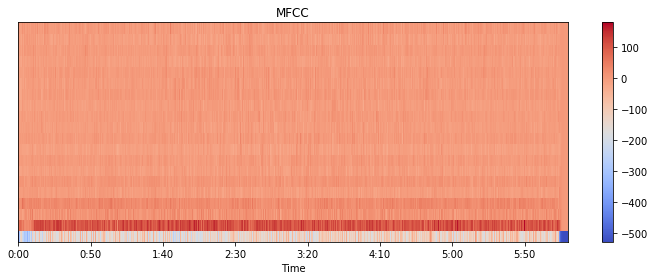

In [21]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

In [15]:
y, sr = librosa.load(audio_files[1])

In [17]:
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

In [18]:
mfcc.shape

(20, 16362)

In [19]:
mean = np.ndarray.mean(mfcc)
mean

-0.5532536496502994

In [20]:
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
cent

array([[0., 0., 0., ..., 0., 0., 0.]])

In [22]:
scem = np.ndarray.mean(cent)
scem

1930.94998886322

In [23]:
S = np.abs(librosa.stft(y))
contrast = librosa.feature.spectral_contrast(S=S, sr=sr)
scom = np.ndarray.mean(contrast)
scom

20.95776054341243